In [100]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from PIL import Image
import matplotlib.pyplot as plt

In [101]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.RandomHorizontalFlip(), 
                                transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])
trainset = datasets.CIFAR10(root="./data", transform=transform, train=True, download=True)
testset = datasets.CIFAR10(root="./data", transform=transform, train=False, download=False)
 
train_dataset = DataLoader(dataset=trainset, batch_size=100, shuffle=True)
test_dataset = DataLoader(dataset=testset, batch_size=100, shuffle=False)

100%|██████████| 170498071/170498071 [02:20<00:00, 1212484.50it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data


In [102]:
class NeuralNet(nn.Module):
  def __init__(self):
    super(NeuralNet, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5) # 3-канал, 6 фильтров для входных данных, 5х5 ядро
    self.pool = nn.MaxPool2d(2, 2) # подвыборка 2х2 пикселя из сверточного слоя
    self.conv2 = nn.Conv2d(6, 16, 5) # 6 входных слоев и тд.
    self.layer1 = nn.Linear(16 * 5 * 5, 128)
    self.layer2 = nn.Linear(128, 64)
    self.layer3 = nn.Linear(64, 10)
 
  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.layer1(x))
    x = F.relu(self.layer2(x))
    x = self.layer3(x)
    return x

In [103]:
model = NeuralNet()
 
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) 
# momentum = 0.9 - инерция обновления весов для градиента, использование 90% обновленных весов для следующего обновления

In [104]:
epochs = 20
 
for epoch in range(epochs):
  for inputs, labels in train_dataset:
    optimizer.zero_grad()
    prediction = model(inputs)
    loss = criterion(prediction, labels)
    loss.backward()
    optimizer.step()
  if (epoch + 1) % 5 == 0: print(f"Epoch: {epoch + 1}, Loss: {loss.item():.4f}")

Epoch: 5, Loss: 1.6818
Epoch: 10, Loss: 1.4955
Epoch: 15, Loss: 1.2665
Epoch: 20, Loss: 1.3008


In [105]:
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_dataset:
        prediction = model(inputs)
        _, predicted = torch.max(prediction.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
 

print(f'Accuracy: {100 * correct / total}%') 

Accuracy: 57.19%


In [106]:
classes = {
    1:'airplane',
    2:'car',
    3:'bird',
    4:'cat',
    5:'deer',
    6:'dog',
    7:'frog',
    8:'horse',
    9:'ship',
    10:'truck'
}

image = Image.open("./images/puppy.jpg")
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((32, 32))])

image_tensor = transform(image)
image_tensor = image_tensor.unsqueeze(0)

predicted_class = model(image_tensor)
_, predicted = torch.max(predicted_class, 1)

classes.get(predicted.item()) # ???

'car'

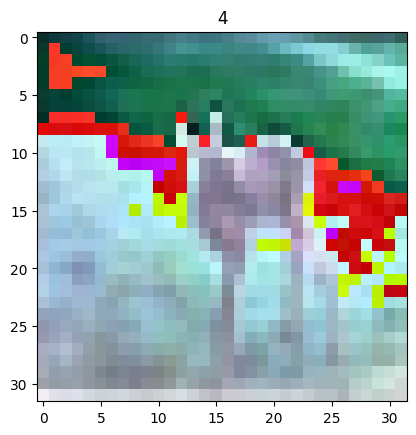

In [107]:
image, label = testset[555]

image = transforms.ToPILImage()(image)
plt.imshow(image)
plt.title(f"{label}")
plt.show()